In [7]:
import os
import glob
from package_nanonis.nanonis_sxm import * #nanonis_sxm 로드
import numpy as np 
import matplotlib.pyplot as plt
from package_utils.cmap_custom import nanox

In [9]:
path = 'C:/Users/Taemin/Desktop/python_prac/Topo/'
path2 = 'TNS_STM6_#*_*.*' # 파일 이름 형식

In [11]:
file_list = sorted(glob.glob(path+path2)) # 조건에 맞는 파일명에 대한 새로운 정렬된 리스트 작성 
sxm_list = []
sxm_list_num = [] # 추출된 sxm file numbers

for i in range(len(file_list)):
    if file_list[i].split('.')[-1] == 'sxm': # 파일 확장자가 sxm일때
        file_list[i] = file_list[i].replace('\\','/') # Mac용 (Mac에서는 경로가 \\로 되어있음)
        sxm_list.append(file_list[i])
        sxm_list_num.append(file_list[i].split('/')[-1].split('#')[-1].split('_')[-2] + file_list[i].split('/')[-1].split('_')[-1].split('.')[-2]) # file number 추출
    else:
        file_list[i] = file_list[i].replace('\\','/')
        print(file_list[i]+':No .sxm files')

sxm_list_num

['1172218',
 '1172384',
 '1172417',
 '1172450',
 '1172938',
 '1173771',
 '1173782',
 '1173982']

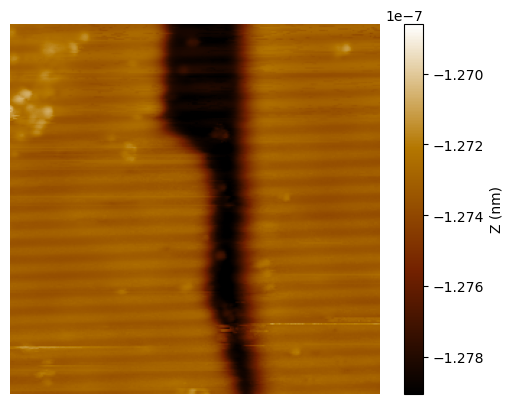

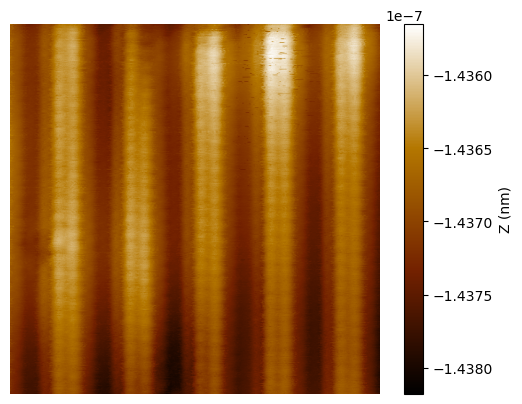

In [13]:
FileList = [117_3782, 117_2938] # 분석하고자 하는 file number

for i in FileList:
    file_num_digit = len(file_list[0].split('/')[-1].split('_')[-1].split('.')[-2])
    file_num = str(i).zfill(file_num_digit) # 자릿수 맞추기 (부족할 시 0으로 채움)

    FilePath = sxm_list[sxm_list_num.index(file_num)]
    topo = topography(FilePath)

    z = topo.get_z()
    plt.imshow(z, vmin = np.mean(z) - 3*np.std(z), vmax = np.mean(z) + 3*np.std(z), cmap = nanox()) 
    cbar = plt.colorbar(location='right') #colormap 추가
    cbar.set_label('Z (nm)')
    plt.axis('off') 
    plt.show()